THEORY QUESTION

Q- 1  What is the difference between K-Means and Hierarchical Clustering?
Provide a use case for each.

  ANS--

   | Aspect             | K-Means        | Hierarchical Clustering    |
| ------------------ | -------------- | -------------------------- |
| Number of clusters | Must specify K | Determined from dendrogram |
| Structure          | Flat           | Hierarchical               |
| Scalability        | High           | Low–Medium                 |
| Interpretability   | Moderate       | High                       |
| Best for           | Large datasets | Exploratory analysis       |


Q-2  Explain the purpose of the Silhouette Score in evaluating clustering
algorithms.

  ANS-- The Silhouette Score is a metric used to evaluate the quality of clustering results by measuring how well each data point fits within its assigned cluster compared to other clusters.

  Purpose of the Silhouette Score:

  * Cluster cohesion:- How close a point is to other points in the same cluster

  * Cluster separation:- How far a point is from points in the nearest neighboring cluster
In simple terms, it tells you how well clusters are formed.

Q-3  What are the core parameters of DBSCAN, and how do they influence the
clustering process?

  ANS-- DBSCAN (Density-Based Spatial Clustering of Applications with Noise) groups points based on data density, rather than distance to centroids. Its behavior is controlled mainly by two core parameters, with a third often discussed.

  1. Core Parameters of DBSCAN

   1. ε (epsilon):- The radius defining a neighborhood around a data point.

    2. MinPts (Minimum Points):- Minimum number of points required within an ε-neighborhood (including the point itself) to form a core point.
    
   


Q- 4  Why is feature scaling important when applying clustering algorithms like
K-Means and DBSCAN?

   ANS--Feature scaling is important in clustering algorithms like K-Means and DBSCAN because these algorithms rely heavily on distance calculations. If features are on different scales, some features will dominate the distance measure and distort the clustering results.

Q-5  What is the Elbow Method in K-Means clustering and how does it help
determine the optimal number of clusters?

  ANS-- The Elbow Method is a heuristic used in K-Means clustering to help choose the optimal number of clusters (K) by analyzing how clustering performance improves as K increases.

Q-6  Generate synthetic data using make_blobs(n_samples=300, centers=4),
apply KMeans clustering, and visualize the results with cluster centers.

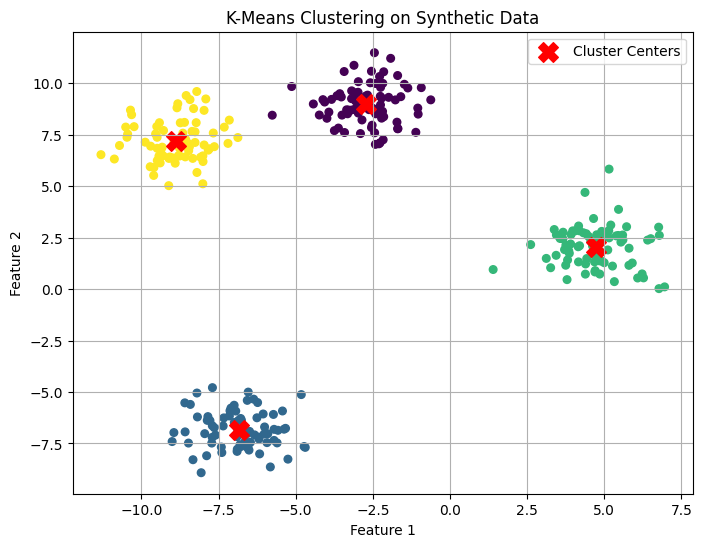

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 1. Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=1.0)

# 2. Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

# 3. Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
plt.scatter(centers[:, 0], centers[:, 1],
            c='red', s=200, marker='X', label='Cluster Centers')

plt.title("K-Means Clustering on Synthetic Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


Q-7  Load the Wine dataset, apply StandardScaler , and then train a DBSCAN
model. Print the number of clusters found (excluding noise)

In [ ]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# 1. Load the Wine dataset
data = load_wine()
X = data.data

# 2. Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train DBSCAN model
dbscan = DBSCAN(eps=1.2, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# 4. Number of clusters (excluding noise)
# Noise points are labeled as -1
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print("Number of clusters found (excluding noise):", n_clusters)


Number of clusters found (excluding noise): 0


Q- 8  Generate moon-shaped synthetic data using
make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in
the plot.

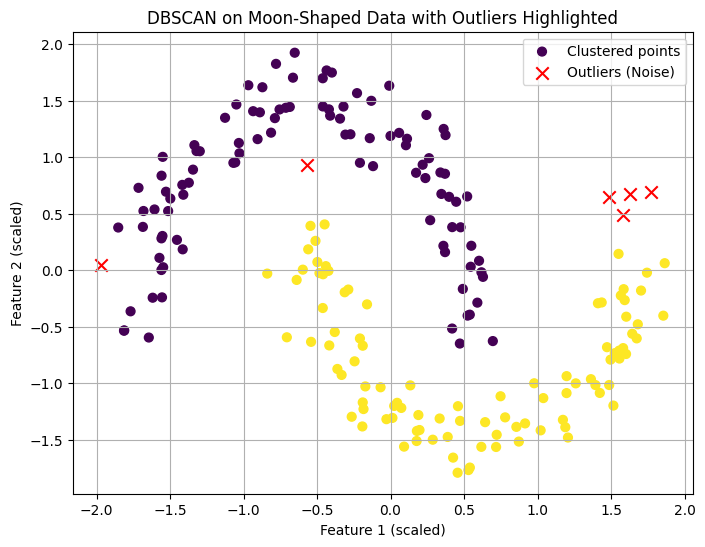

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# 1. Generate moon-shaped data
X, _ = make_moons(n_samples=200, noise=0.1, random_state=42)

# 2. Scale the data (important for DBSCAN)
X_scaled = StandardScaler().fit_transform(X)

# 3. Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# 4. Separate core clusters and outliers
outliers = labels == -1
clusters = labels != -1

# 5. Plot the results
plt.figure(figsize=(8, 6))

# Plot clusters
plt.scatter(
    X_scaled[clusters, 0],
    X_scaled[clusters, 1],
    c=labels[clusters],
    cmap='viridis',
    s=40,
    label='Clustered points'
)

# Plot outliers
plt.scatter(
    X_scaled[outliers, 0],
    X_scaled[outliers, 1],
    c='red',
    s=80,
    marker='x',
    label='Outliers (Noise)'
)

plt.title("DBSCAN on Moon-Shaped Data with Outliers Highlighted")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.legend()
plt.grid(True)
plt.show()


Q- 9  Load the Wine dataset, reduce it to 2D using PCA, then apply
Agglomerative Clustering and visualize the result in 2D with a scatter plot.

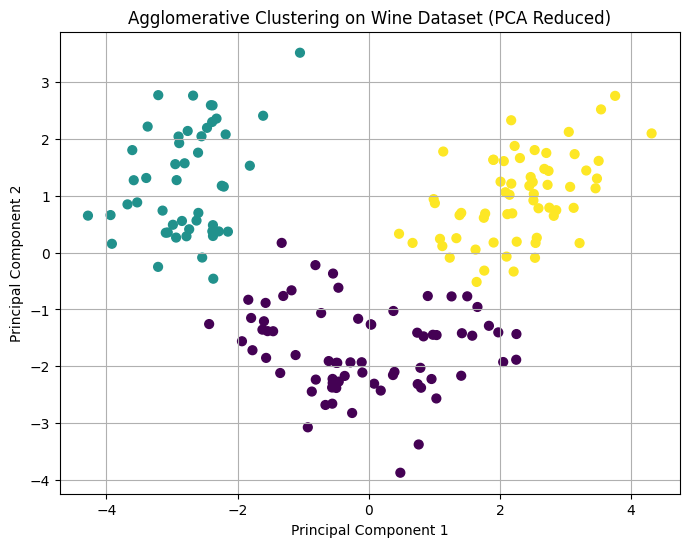

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# 1. Load the Wine dataset
wine = load_wine()
X = wine.data

# 2. Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = agg_clustering.fit_predict(X_pca)

# 5. Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=labels,
    cmap='viridis',
    s=40
)

plt.title("Agglomerative Clustering on Wine Dataset (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


Q- 10  You are working as a data analyst at an e-commerce company. The
marketing team wants to segment customers based on their purchasing behavior to run
targeted promotions. The dataset contains customer demographics and their product
purchase history across categories.
Describe your real-world data science workflow using clustering:

● Which clustering algorithm(s) would you use and why?

● How would you preprocess the data (missing values, scaling)?

● How would you determine the number of clusters?

● How would the marketing team benefit from your clustering analysis?

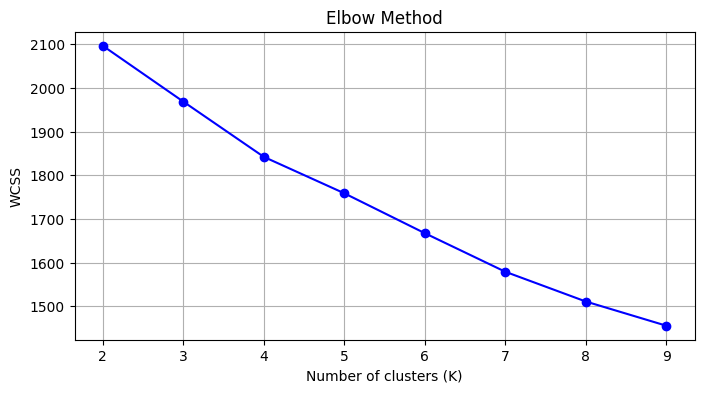

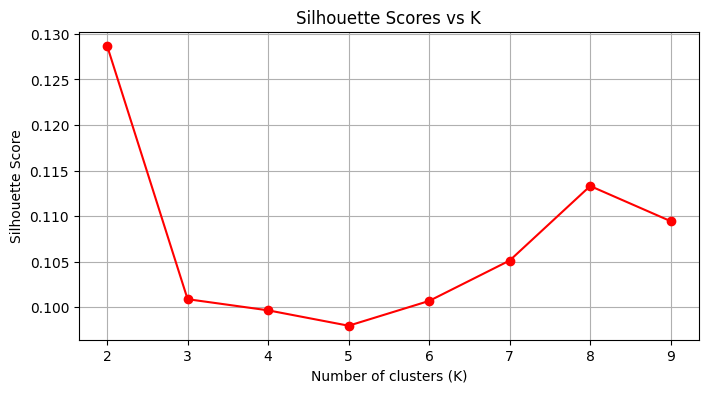

Cluster Summary:
          Category_1  Category_2  Category_3  Category_4  Category_5  \
Cluster                                                               
0        612.813923  717.772701  508.781351  498.755830  508.604877   
1        621.027436  695.104027  506.153781  501.484911  559.327440   
2        541.065257  200.730046  570.303757  593.820311  501.046835   
3        294.397763  351.574624  365.003043  342.483906  480.208116   

               Age        Income    Gender  
Cluster                                     
0        42.560000  71803.493333  1.000000  
1        43.658824  73919.000000  0.000000  
2        30.357143  67490.657143  0.428571  
3        56.685714  68629.071429  0.385714  


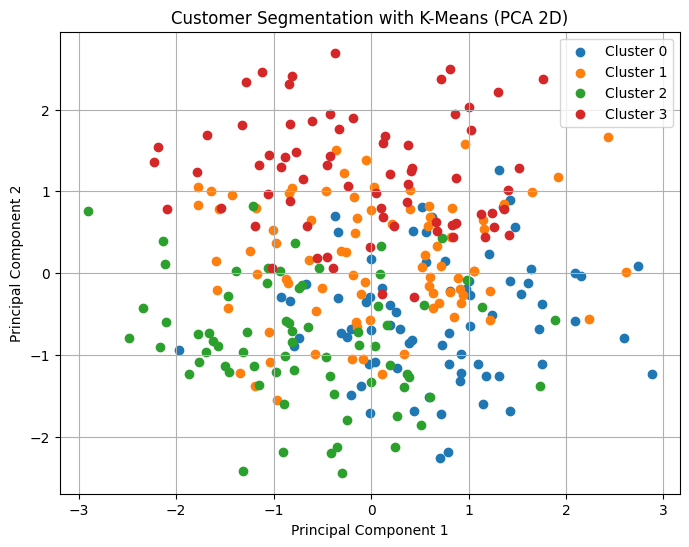

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# -------------------------------
# Step 1: Simulate E-commerce Dataset
# -------------------------------
np.random.seed(42)
n_customers = 300

# Demographics
age = np.random.randint(18, 70, size=n_customers)
income = np.random.randint(20000, 120000, size=n_customers)
gender = np.random.choice([0, 1], size=n_customers)  # 0: Male, 1: Female

# Purchase history: spend in 5 categories
purchase_history = np.random.rand(n_customers, 5) * 1000

# Create DataFrame
data = pd.DataFrame(purchase_history, columns=[f'Category_{i+1}' for i in range(5)])
data['Age'] = age
data['Income'] = income
data['Gender'] = gender

# -------------------------------
# Step 2: Preprocess the Data
# -------------------------------
# Handle missing values (simulate missing values)
data.loc[np.random.choice(data.index, 10), 'Category_1'] = np.nan
data.fillna(data.mean(), inplace=True)  # Impute missing values with mean

# Feature Scaling
features = data.columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[features])

# -------------------------------
# Step 3: Determine Optimal Number of Clusters
# -------------------------------
wcss = []
silhouette_scores = []

K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Plot WCSS (Elbow Method)
plt.figure(figsize=(8, 4))
plt.plot(K_range, wcss, 'bo-', label='WCSS')
plt.title("Elbow Method")
plt.xlabel("Number of clusters (K)")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(K_range, silhouette_scores, 'ro-', label='Silhouette Score')
plt.title("Silhouette Scores vs K")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# -------------------------------
# Step 4: Apply K-Means with Optimal K
# -------------------------------
optimal_k = 4  # Example: chosen based on Elbow & Silhouette
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# -------------------------------
# Step 5: Analyze Clusters
# -------------------------------
cluster_summary = data.groupby('Cluster').mean()
print("Cluster Summary:\n", cluster_summary)

# -------------------------------
# Step 6: Visualize Clusters (PCA 2D)
# -------------------------------
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    plt.scatter(X_pca[data['Cluster'] == cluster, 0],
                X_pca[data['Cluster'] == cluster, 1],
                label=f'Cluster {cluster}')

plt.title("Customer Segmentation with K-Means (PCA 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()
